In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_excel("aggregated_file_copy.xlsx")

In [109]:
data.head()

,Commodity Code,Item Description,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),...,Market Sector/Industry,Lat,Long,Delivery Method,Item Type,Flag,coordinates,state,city,suburb
0,AAAF,Additional scope,1.00,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,...,Water,-27.615177,152.753355,Framework,Item,0.0,"-27.6151768, 152.7533551",Queensland,Ipswich City,Ipswich
1,ARBE,Reinstatement of concrete driveway,283.48,0.0,10343.0,238.0,19601.0,21217.0,0.0,2.720274,...,Water,-27.402220,152.986970,Framework,Item,0.0,"-27.40222, 152.98697",Queensland,Brisbane City,Everton Park
2,ARBE,Reinstatement of concrete driveway,4.20,0.0,1935.0,4.0,290.0,314.0,0.0,0.040303,...,Water,-27.463210,153.046610,Framework,Item,0.0,"-27.46321, 153.04661",Queensland,Brisbane City,New Farm
3,ARBE,Reinstatement of Driveway,22.60,0.0,4725.0,19.0,1563.0,1692.0,0.0,0.216870,...,Water,-27.360910,153.020140,Framework,Item,1.0,"-27.36091, 153.02014",Queensland,Brisbane City,Aspley
4,ARBE,Reinstatement of concrete driveway,128.66,0.0,10122.0,108.0,8896.0,9630.0,0.0,1.234621,...,Water,-27.305360,153.061760,Framework,Item,0.0,"-27.30536, 153.06176",Queensland,Brisbane City,Brighton


In [110]:
data.shape

(2561, 39)

In [111]:
data.isnull().sum()

Commodity Code                0
Item Description              0
Qty                           1
PE Amount                  2050
BM Amount                  2030
LB hrs                     2029
LB Amount                  2028
CE Amount                  2029
Major SC Amount             148
Fuel usage (L)             2125
Attribute 1                 447
Attribute 2                 447
Attribute 3                 447
Attribute 4                2156
project_number                0
total_new                     0
Total                      2175
Single Unit Price          2176
epic_embodied_carbon         64
aus_lci_embodied_carbon      64
carbon_allowance             64
construction_carbon          64
Default PE Unit Price      1651
Default BM Unit Price      1651
Default LB Unit Hrs        2307
Default SC Unit Rate       1651
Project Name                  7
Greenfield/ Brownfield        7
Client                        7
Market Sector/Industry        7
Lat                           7
Long    

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           2561 non-null   object 
 1   Item Description         2561 non-null   object 
 2   Qty                      2560 non-null   float64
 3   PE Amount                511 non-null    float64
 4   BM Amount                531 non-null    float64
 5   LB hrs                   532 non-null    float64
 6   LB Amount                533 non-null    float64
 7   CE Amount                532 non-null    float64
 8   Major SC Amount          2413 non-null   float64
 9   Fuel usage (L)           436 non-null    float64
 10  Attribute 1              2114 non-null   float64
 11  Attribute 2              2114 non-null   float64
 12  Attribute 3              2114 non-null   float64
 13  Attribute 4              405 non-null    float64
 14  project_number          

In [113]:
data.fillna(method='backfill',inplace=True)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           2561 non-null   object 
 1   Item Description         2561 non-null   object 
 2   Qty                      2561 non-null   float64
 3   PE Amount                2492 non-null   float64
 4   BM Amount                2492 non-null   float64
 5   LB hrs                   2492 non-null   float64
 6   LB Amount                2492 non-null   float64
 7   CE Amount                2491 non-null   float64
 8   Major SC Amount          2561 non-null   float64
 9   Fuel usage (L)           2491 non-null   float64
 10  Attribute 1              2484 non-null   float64
 11  Attribute 2              2484 non-null   float64
 12  Attribute 3              2484 non-null   float64
 13  Attribute 4              2484 non-null   float64
 14  project_number          

In [115]:
data = data.dropna()

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 927
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           928 non-null    object 
 1   Item Description         928 non-null    object 
 2   Qty                      928 non-null    float64
 3   PE Amount                928 non-null    float64
 4   BM Amount                928 non-null    float64
 5   LB hrs                   928 non-null    float64
 6   LB Amount                928 non-null    float64
 7   CE Amount                928 non-null    float64
 8   Major SC Amount          928 non-null    float64
 9   Fuel usage (L)           928 non-null    float64
 10  Attribute 1              928 non-null    float64
 11  Attribute 2              928 non-null    float64
 12  Attribute 3              928 non-null    float64
 13  Attribute 4              928 non-null    float64
 14  project_number           928 no

In [117]:
data['Attribute 4'].unique()

array([0.])

In [118]:
cat_cols = []
num_cols = []
for column in data:
    if(data[column].dtype=='O'):
        cat_cols.append(column)
    else:
        num_cols.append(column)
print(len(cat_cols))
print(len(num_cols))

12
27


In [119]:
numeric_data = data[num_cols]

In [120]:
numeric_data.head()

,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),Attribute 1,Attribute 2,...,aus_lci_embodied_carbon,carbon_allowance,construction_carbon,Default PE Unit Price,Default BM Unit Price,Default LB Unit Hrs,Default SC Unit Rate,Lat,Long,Flag
0,1.00,0.0,10343.0,238.0,19601.0,21217.0,2500.0,2.720274,10.0,9.0,...,0.0,506.527909,0.000000,0.0,0.00,0.08,0.0,-27.615177,152.753355,0.0
1,283.48,0.0,10343.0,238.0,19601.0,21217.0,0.0,2.720274,10.0,7.0,...,0.0,4115.764458,0.007345,0.0,36.52,4.00,0.0,-27.402220,152.986970,0.0
2,4.20,0.0,1935.0,4.0,290.0,314.0,0.0,0.040303,10.0,5.0,...,0.0,769.989773,0.000109,0.0,36.52,4.00,0.0,-27.463210,153.046610,0.0
3,22.60,0.0,4725.0,19.0,1563.0,1692.0,0.0,0.216870,12.0,7.0,...,0.0,1880.207586,0.000586,0.0,36.52,4.00,0.0,-27.360910,153.020140,1.0
4,128.66,0.0,10122.0,108.0,8896.0,9630.0,0.0,1.234621,16.0,5.0,...,0.0,4027.822473,0.003333,0.0,36.52,4.00,0.0,-27.305360,153.061760,0.0


<Axes: >

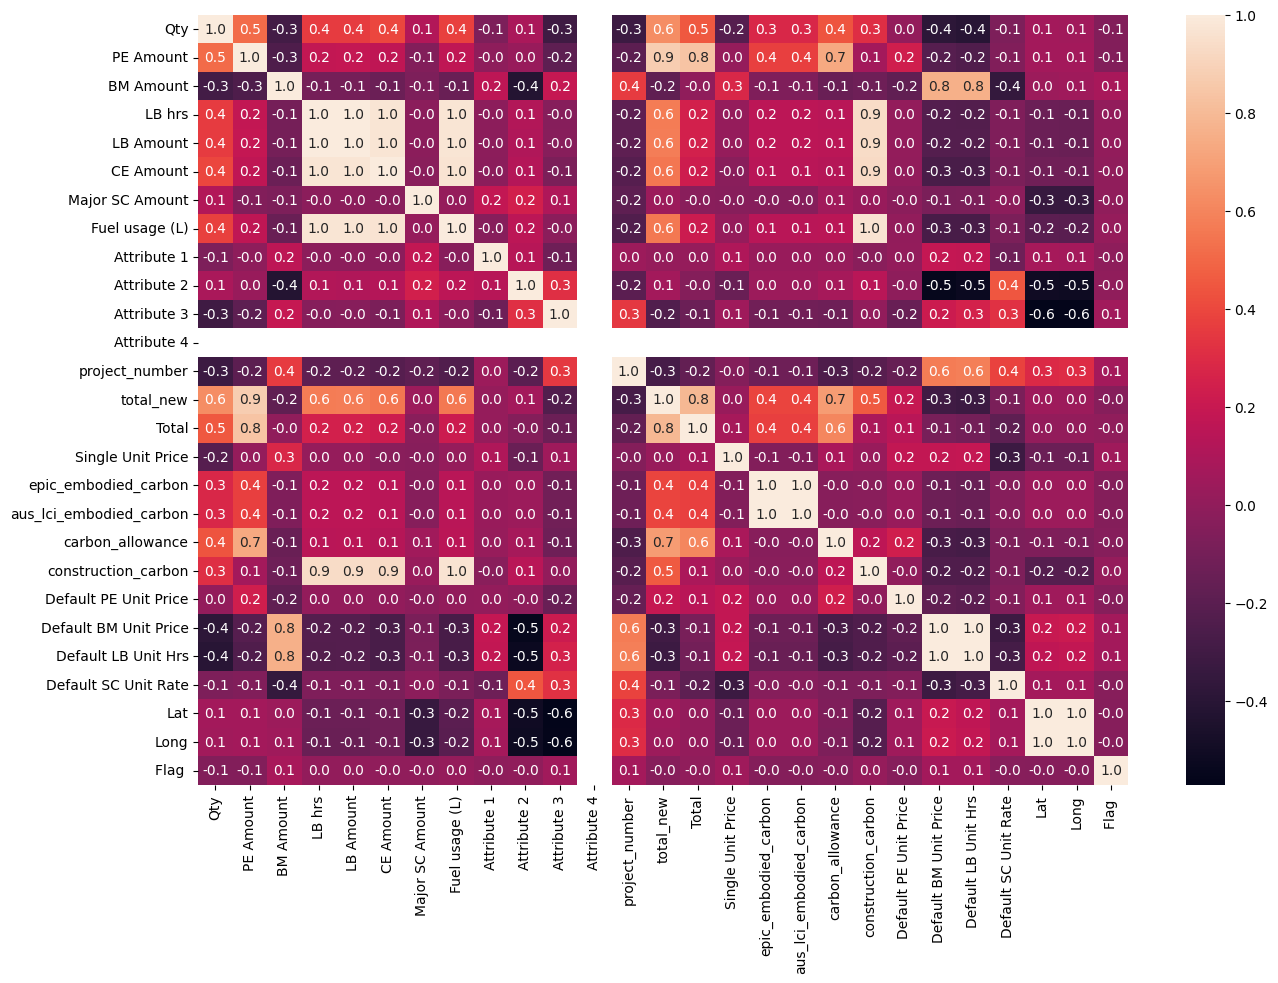

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(data=numeric_data.corr(),fmt='.1f',annot=True)

In [122]:
numeric_data.corr()

,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),Attribute 1,Attribute 2,...,aus_lci_embodied_carbon,carbon_allowance,construction_carbon,Default PE Unit Price,Default BM Unit Price,Default LB Unit Hrs,Default SC Unit Rate,Lat,Long,Flag
Qty,1.000000,0.510443,-0.288715,0.359209,0.358551,0.392938,0.120517,0.377710,-0.073010,0.088632,...,0.276262,0.439014,0.308714,0.010941,-0.384125,-0.400908,-0.071860,0.063339,0.056263,-0.052307
PE Amount,0.510443,1.000000,-0.251659,0.183799,0.186711,0.165972,-0.053485,0.168709,-0.007025,0.025908,...,0.372592,0.731899,0.067024,0.236770,-0.218213,-0.240368,-0.061464,0.065105,0.062274,-0.050204
BM Amount,-0.288715,-0.251659,1.000000,-0.099795,-0.100001,-0.136236,-0.071880,-0.142122,0.164247,-0.419076,...,-0.065762,-0.143567,-0.127576,-0.177464,0.757618,0.756612,-0.350214,0.042704,0.050490,0.082863
LB hrs,0.359209,0.183799,-0.099795,1.000000,0.999326,0.972130,-0.023927,0.971337,-0.015334,0.116750,...,0.157631,0.146442,0.935369,0.010358,-0.225991,-0.228238,-0.064888,-0.139945,-0.142693,0.004338
LB Amount,0.358551,0.186711,-0.100001,0.999326,1.000000,0.971332,-0.023630,0.970605,-0.015115,0.116376,...,0.158002,0.148925,0.934589,0.011870,-0.224637,-0.227035,-0.064493,-0.140830,-0.143553,0.004453
CE Amount,0.392938,0.165972,-0.136236,0.972130,0.971332,1.000000,-0.029475,0.964391,-0.021881,0.122618,...,0.143404,0.134397,0.929764,0.002723,-0.264109,-0.267381,-0.075630,-0.116921,-0.120591,-0.005355
Major SC Amount,0.120517,-0.053485,-0.071880,-0.023927,-0.023630,-0.029475,1.000000,0.016592,0.180345,0.241697,...,-0.041386,0.059943,0.027778,-0.022985,-0.082209,-0.078005,-0.018139,-0.340876,-0.342009,-0.003821
Fuel usage (L),0.377710,0.168709,-0.142122,0.971337,0.970605,0.964391,0.016592,1.000000,-0.032489,0.157899,...,0.145776,0.149952,0.967155,0.002069,-0.273109,-0.273422,-0.078524,-0.199011,-0.202647,0.012887
Attribute 1,-0.073010,-0.007025,0.164247,-0.015334,-0.015115,-0.021881,0.180345,-0.032489,1.000000,0.136975,...,0.026264,0.020240,-0.026802,0.007086,0.187629,0.183609,-0.127396,0.073643,0.071874,-0.010167
Attribute 2,0.088632,0.025908,-0.419076,0.116750,0.116376,0.122618,0.241697,0.157899,0.136975,1.000000,...,0.039843,0.074799,0.146769,-0.011611,-0.548940,-0.523354,0.442141,-0.504130,-0.511158,-0.001331


In [123]:
cat_cols

['Commodity Code',
 'Item Description',
 'Project Name',
 'Greenfield/ Brownfield',
 'Client',
 'Market Sector/Industry',
 'Delivery Method',
 'Item Type',
 'coordinates',
 'state',
 'city',
 'suburb']

<Axes: >

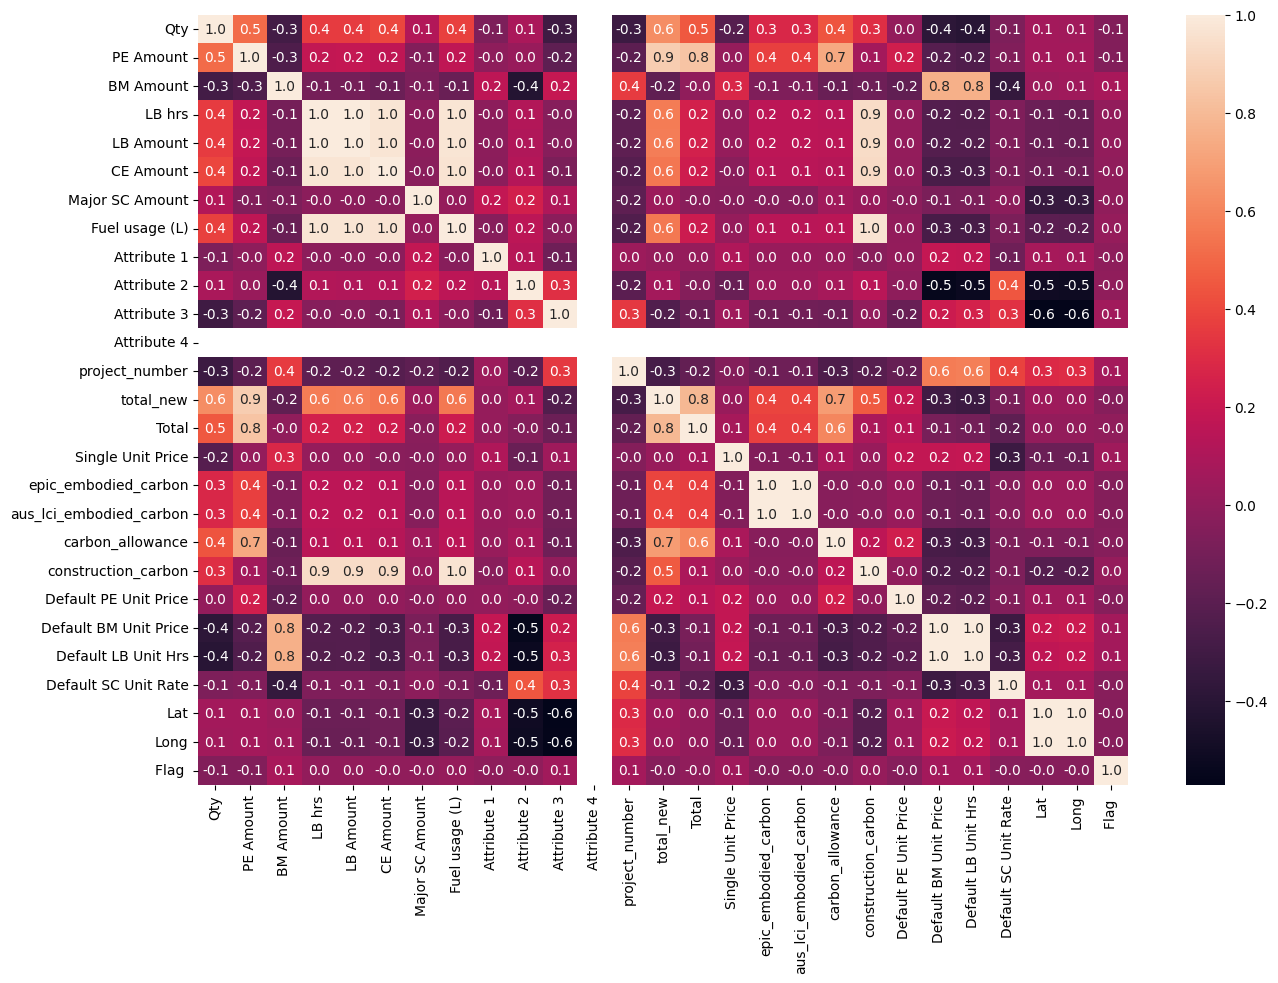

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(data=numeric_data.corr(),fmt='.1f',annot=True)

In [125]:
x = data.drop(columns='Total',axis=1)
y = data['Total']

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(742, 38) (742,) (186, 38) (186,)


In [128]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [129]:
for column in range(len(cat_cols)):
    x_train[cat_cols[column]] = encoder.fit_transform(x_train[cat_cols[column]])
    x_test[cat_cols[column]] = encoder.fit_transform(x_test[cat_cols[column]])

In [130]:
x_train

,Commodity Code,Item Description,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),...,Market Sector/Industry,Lat,Long,Delivery Method,Item Type,Flag,coordinates,state,city,suburb
381,17,14,1.00,0.0,32500.0,0.0,0.0,0.0,263.0,0.000000,...,0,-27.565668,153.035689,0,0,0.0,265,0,1,35
499,17,14,2.00,0.0,32500.0,0.0,0.0,0.0,526.0,0.000000,...,0,-27.469467,153.070725,0,0,1.0,176,0,1,88
97,3,35,26.29,0.0,787.0,22.0,1836.0,1987.0,0.0,0.254749,...,0,-27.398219,153.019303,0,0,1.0,45,0,1,71
250,9,9,1.00,0.0,32500.0,0.0,0.0,0.0,190.0,0.000000,...,0,-27.609820,152.766216,0,0,1.0,297,0,2,111
198,6,73,1.00,0.0,0.0,0.0,0.0,0.0,100.0,0.000000,...,0,-27.616376,152.765636,0,0,1.0,321,0,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,28,389.60,0.0,11657.0,289.0,23779.0,25739.0,0.0,3.300064,...,0,-27.376338,153.062553,0,0,1.0,25,0,1,138
270,10,41,1.00,0.0,32500.0,0.0,0.0,0.0,9904.0,0.000000,...,0,-27.397404,153.075955,0,0,1.0,43,0,1,98
860,42,74,1.00,0.0,21057.0,232.0,19903.0,8409.0,2425.0,1.659429,...,0,-34.954605,138.641998,0,0,0.0,375,1,0,53
435,17,14,2.00,0.0,32500.0,0.0,0.0,0.0,60.0,0.000000,...,0,-27.428968,152.986853,0,0,1.0,106,0,1,45


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
x_train

array([[-0.02477969, -0.71798457, -0.38578451, ..., -0.29119636,
        -0.01009643, -0.79634002],
       [-0.02477969, -0.71798457, -0.37619328, ..., -0.29119636,
        -0.01009643,  0.39854981],
       [-1.20556592,  0.15830865, -0.1432222 , ..., -0.29119636,
        -0.01009643,  0.01528326],
       ...,
       [ 2.08376715,  1.78571035, -0.38578451, ...,  3.43410883,
        -2.50728079, -0.39052838],
       [-0.02477969, -0.71798457, -0.37619328, ..., -0.29119636,
        -0.01009643, -0.57088911],
       [-1.20556592, -0.13378909,  0.82462923, ..., -0.29119636,
        -0.01009643, -1.54032804]])

In [134]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [135]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((742, 38), (742,), (186, 38), (186,))

In [136]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [137]:
y_pred = linear_model.predict(x_train)

In [138]:
from sklearn.metrics import r2_score
prediction = r2_score(y_train,y_pred)

In [139]:
prediction

0.8371460844453819

In [140]:
y_pred = linear_model.predict(x_test)
prediction = r2_score(y_test,y_pred)

In [141]:
prediction

0.564901593125089